<a href="https://colab.research.google.com/github/inesluparia/ML/blob/master/Students_final_grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
!git clone https://github.com/inesluparia/ML.git

fatal: destination path 'ML' already exists and is not an empty directory.


In [ ]:
dataFrame = pd.read_csv('ML/student_prediction.csv')

In [ ]:
dataFrame.head() #print top of the data

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [ ]:
dataFrame.shape

(145, 33)

In [ ]:
dataFrame.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

In [ ]:
dataframe = dataFrame.drop(['STUDENTID','CLASSROOM', 'IMPACT', 'COURSE ID'], axis=1)

In [ ]:
dataframe.shape

(145, 29)

In [ ]:
dataframe.columns

Index(['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY',
       'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU',
       '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS',
       'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'ATTEND', 'PREP_STUDY',
       'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CUML_GPA', 'EXP_GPA',
       'GRADE'],
      dtype='object')

In [ ]:
dataframe = pd.get_dummies(dataframe, columns=['GENDER']) 
#dataframe = pd.get_dummies(dataframe, columns=['GRADE']) 


In [ ]:
dataframe.shape

(145, 30)

In [ ]:
pd.set_option('display.max_columns', None) # print all columns
X = dataFrame.iloc[:, 1:-1] # select relevant rows and columns to X
y = dataFrame.iloc[:,-1] # select column(s) for y (here only the last column)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [ ]:
#print(y[0:5])

In [ ]:
#not needed here done before... X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding), e.g. gender, country etc.
columnNames = list(X.columns) # grab column-names before converting to numpy array
X = X.values # convert from Pandas dataframe to numpy array
y = y.values # convert from Pandas dataframe to numpy array

In [ ]:
print(X[0:4,:])

[[2 2 3 3 1 2 2 1 1 1 1 2 3 1 2 5 3 2 2 1 1 1 1 1 3 2 1 2 1 1 1]
 [2 2 3 3 1 2 2 1 1 1 2 3 2 1 2 1 2 2 2 1 1 1 1 1 3 2 3 2 2 3 1]
 [2 2 2 3 2 2 2 2 4 2 2 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1 1 2 2 1]
 [1 1 1 3 1 2 1 2 1 2 1 2 5 1 2 1 3 1 2 1 1 1 1 2 3 2 2 1 3 2 1]]


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array
#print(X[0:6,:])

1. WHY DEMOCRATS PREDICTION WAS MEAN SQUARE ERROR??????? HOW IS THAT LINEAR? -IT HAD 3 OUTPUT CAUSE IT WAS TURNED TO CATEGORICAL VALUES LIKE GENDER - ONE HOT ENCODING.
2. SEQUENTIAL INSTEAD OF WHAT?
3. ACTIVATION CODES FOR OUTPUT? NOT CLEAR WHICH TO USE? BIBLIOGRAPHY? STANDARD NEURONS NUMBER IN LAYERS?

In [ ]:
model = Sequential()
#model.add(Dense(30,activation='relu'))
model.add(Dense(116,activation='relu')) # 30 outputs. It will automatically adapt to number inputs
model.add(Dense(116,activation='relu'))
model.add(Dense(1)) # Final output node for prediction. In this case, only one output neuron
######model.add(Dense(7)) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) 
model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])  
# use loss = 'binary_crossentropy' for two-class classification.
#use loss = 'categorical_crossentropy' for multi-class classification.
#use loss = mse (Mean Square Error) for regression (e.g. the Age,Height exercise). 
#use metrics = ['accuracy']. It shows successful predictions / total predictions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 22 )
# random_state set to some value will provide same output - its a seed for randomizing

In [ ]:
model.fit(X_train,y_train,epochs=1000, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.

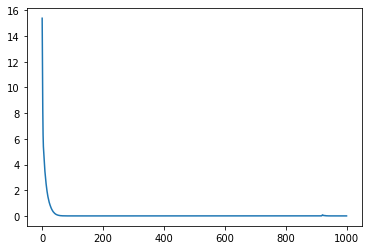

In [ ]:
#show loss vs epochs
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [ ]:
#Get model prediction accuracy on test data
model.evaluate(X_test,y_test,verbose=1) 

1/1 [==============================] - 0s 157ms/step - loss: 3.6756 - accuracy: 0.2414


[3.675629138946533, 0.24137930572032928]

In [ ]:
#Confusion matrix. Get details about each type of prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)

# will return a 2D array like this (random numbers):
#[[6432   326]
 #[ 481  1190]]

# interpretation:
# Top-left: 6432 correct predictions of 1. 
# Top-right: 326 incorrect predictions of 1, when the y_test was 0.
# Bottom-left: 481 incorrect predictions of 0, when the y_test was 1.
# Bottom-right: 1190 correct predictions of 0

[[7 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]]


In [ ]:
print(columnNames) # first print column names, so you can enter new data in the correct columns

['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID']


In [ ]:
new_value = [[37, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 3, 1, 2, 4, 3, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 3, 5, 5]] # enter new data in 2D array. Only numbers + dummy variables. 
new_value = scaler.transform(new_value) # Don't forget to scale!
print(new_value)
model.predict(new_value)

ValueError: ignored

In [ ]:
#model.save('good_enough_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#myModel = load_model('my_model.h5') # myModel is ready for predicting right away!

In [ ]:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40 years old
# Tenure: 3 years
# Balance: $ 60000
# Number of Products: 2
# Does this customer have a credit card? Yes
# Is this customer an Active Member: Yes
# Estimated Salary: $ 50000
# # 